In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
raw_data_folder='Desktop/CREM/Raw Data/OFS'
os.listdir(raw_data_folder)

['.DS_Store',
 'energy_consumption_by_consumers.xls',
 'final_energy_consumption.xls',
 'electricity_production.xls',
 'new_renewables_energy_production.xls',
 'renewables_energy_consumption.xls',
 'compte_énergie_ménages_economie.xls',
 'utilization_rate_nuclear_centrals.xls',
 'Démographie par canton.xlsx',
 'Données démographie suisse.xlsx',
 'energy_importation.xls']

In [2]:
def changeinzero(x):
    if type(x) is str:
        return 0
    else:
        return x

In [3]:
head_row=['Année','Total (TJ)','Combustibles pétroliers (TJ)','Carburants (TJ)','Électricité (TJ)','Gaz (TJ)','Charbon (TJ)','Bois (TJ)','CAD (TJ)','Déchets (TJ)','ENR (TJ)']
ec=pd.read_excel(os.path.join(raw_data_folder,'final_energy_consumption.xls'),skiprows=9,skip_footer=11,names=head_row)
ec.set_index(['Année'],inplace=True)
ec['CAD (TJ)'] = ec['CAD (TJ)'].map(changeinzero)
ec['Déchets (TJ)'] = ec['Déchets (TJ)'].map(changeinzero)
ec['ENR (TJ)'] = ec['ENR (TJ)'].map(changeinzero)
data_folder='Desktop/CREM/Data'
ec.to_csv(os.path.join(data_folder,'final_energy_consumption_v1'))

<IPython.core.display.Javascript object>


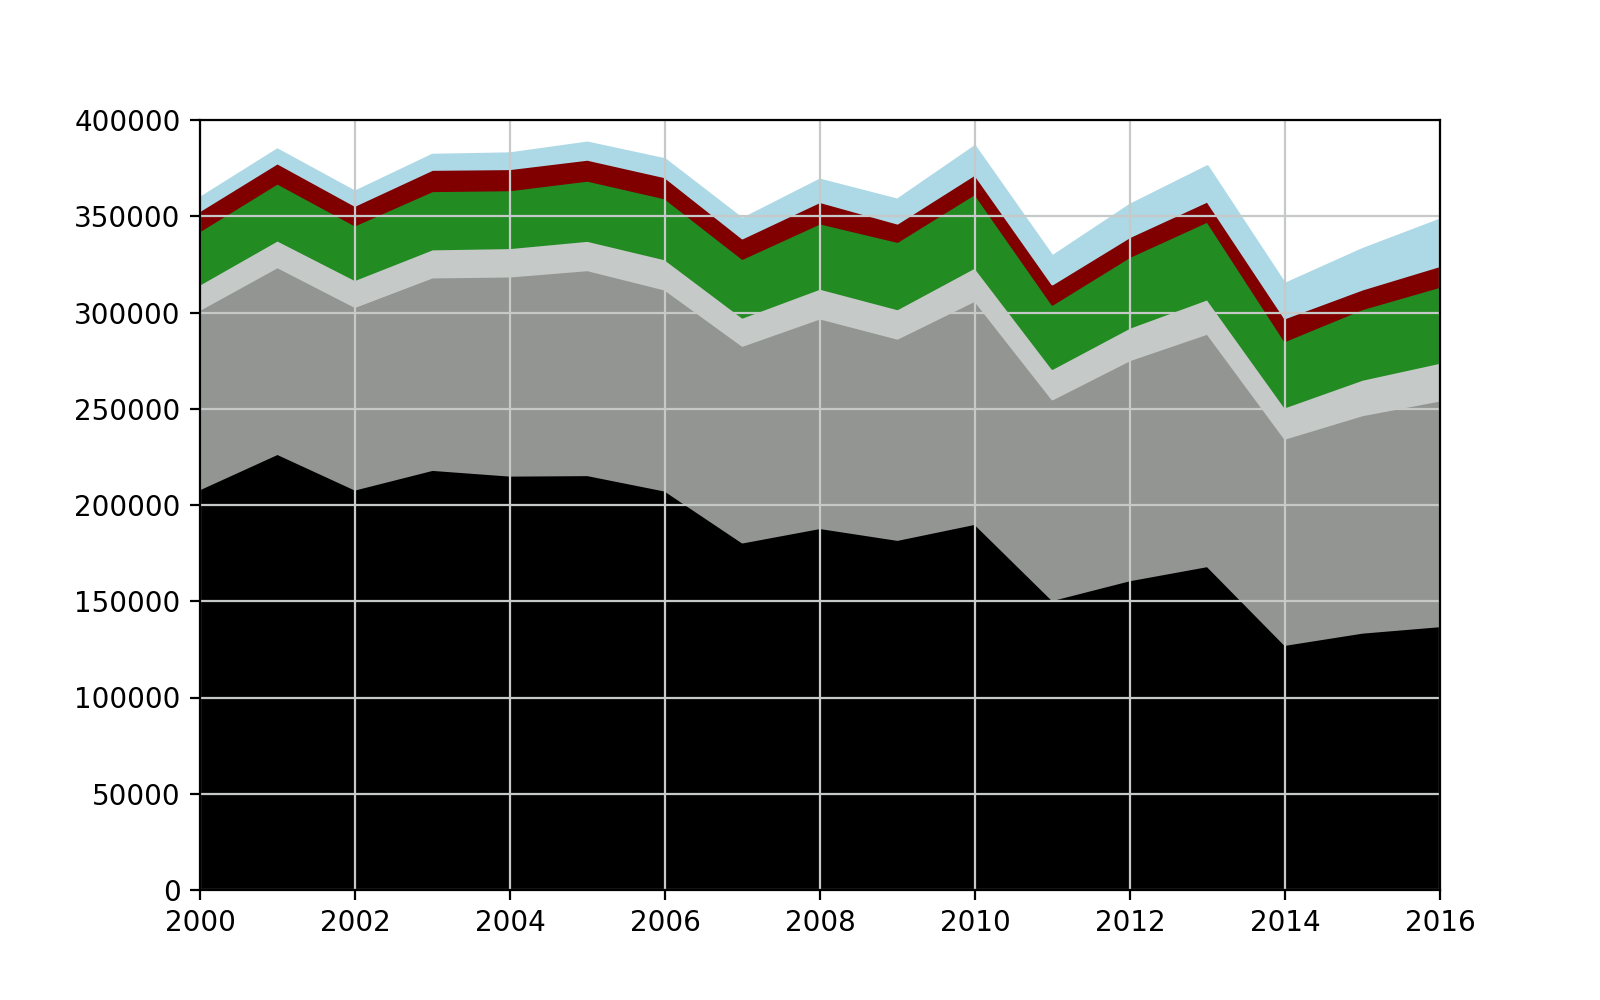

/Users/Roman/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[2000, 2016, 0, 400000]

In [32]:
%matplotlib notebook
plt.figure("Consommation finale d'énergie",figsize=(8,5))
plt.fill_between(ec.index,0,ec['Combustibles pétroliers (TJ)'],color='black')
plt.fill_between(ec.index,ec['Combustibles pétroliers (TJ)'],(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']),color='xkcd:grey')
plt.fill_between(ec.index,(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']),(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']),color='xkcd:silver')
plt.fill_between(ec.index,(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']),(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']+ec['Bois (TJ)']),color='forestgreen')
plt.fill_between(ec.index,(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']+ec['Bois (TJ)']),(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']+ec['Bois (TJ)']+ec['Déchets (TJ)']),color='maroon')
plt.fill_between(ec.index,(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']+ec['Bois (TJ)']+ec['Déchets (TJ)']),(ec['Gaz (TJ)']+ec['Combustibles pétroliers (TJ)']+ec['CAD (TJ)']+ec['Bois (TJ)']+ec['Déchets (TJ)']+ec['ENR (TJ)']),color='lightblue')

plt.legend()
plt.grid(color='xkcd:silver')
plt.axis([2000,2016,0,400000])